In [7]:
#Importando bibliotecas
import pandas as pd
import numpy as np
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from unidecode import unidecode


In [8]:
#Conectando dataset
dados = pd.read_csv('distritossp.csv')
print(dados)
print(dados.info())

    cod_ibge          distritos  renda      quota  escolaridade  idade  \
0          1          Água Rasa   1961  34.619999           7.6     32   
1         12  Alto de Pinheiros   4180  75.959999           8.4     33   
2         23         Anhanguera   1093   4.500000           5.8     23   
3         34         Aricanduva   1311  21.020000           6.8     27   
4         45        Artur Alvim   1248  15.910000           7.0     27   
..       ...                ...    ...        ...           ...    ...   
91        92      Vila Medeiros   1405  19.760000           6.8     27   
92        93      Vila Prudente   1755  32.080002           7.2     30   
93        94         Vila Sônia   2970  41.410000           7.4     27   
94        95       São Domingos   2047  23.510000           6.8     26   
95        96            Lajeado    775   8.490000           5.4     21   

    mortalidade    txcresc   causasext  favel     denspop  
0         13.86  -1.840000   52.980000   0.00  125.

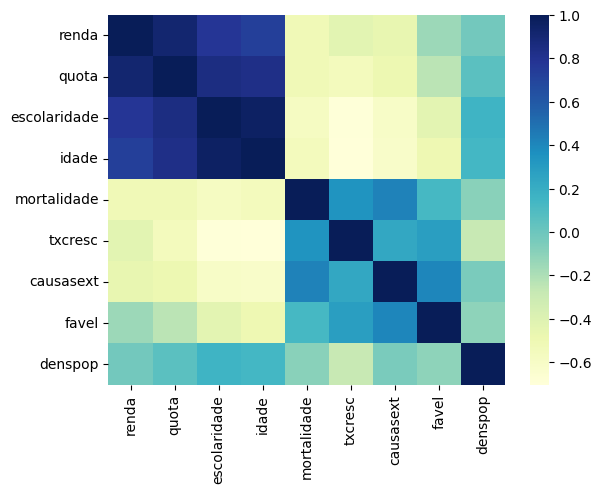

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


In [9]:
#Tratando dados
dados_number = dados.drop(['cod_ibge', 'distritos'], axis=1)
corr = dados_number.corr()


sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, cmap='YlGnBu')
plt.show()
corr

In [10]:
#KMO
kmo_v, kmo_g = calculate_kmo(dados_number)
print('Var KMO:', kmo_v)
print('Global KMO:', kmo_g)

#Bartlett
qui_quadrado, p_value = calculate_bartlett_sphericity(dados_number)
print('Qui Quadrado:', qui_quadrado)
print('P-Value:', p_value) #Benchmark para taxa de insignificância--> 0.05
#P-Value é menor que 0.05, portanto deve ser considerada a Hipótese Alternativa


x = np.matrix(dados_number)
print(x)

s = np.cov(np.transpose(x))
print(s)

Var KMO: [0.77821831 0.81941916 0.8560973  0.81750459 0.94677797 0.84146713
 0.89083164 0.78871213 0.63275248]
Global KMO: 0.8330914241829291
Qui Quadrado: 748.1593126421544
P-Value: 5.607017481839493e-134
[[ 1.96100000e+03  3.46199989e+01  7.59999990e+00  3.20000000e+01
   1.38599997e+01 -1.84000003e+00  5.29799995e+01  0.00000000e+00
   1.25610001e+02]
 [ 4.18000000e+03  7.59599991e+01  8.39999962e+00  3.30000000e+01
   8.68000031e+00 -2.51999998e+00  3.85699997e+01  6.89999998e-01
   5.75600014e+01]
 [ 1.09300000e+03  4.50000000e+00  5.80000019e+00  2.30000000e+01
   1.53599997e+01  1.81200008e+01  2.26800003e+01  0.00000000e+00
   8.56999969e+00]
 [ 1.31100000e+03  2.10200005e+01  6.80000019e+00  2.70000000e+01
   1.84300003e+01 -1.07000005e+00  7.62200012e+01  5.38000011e+00
   1.38539993e+02]
 [ 1.24800000e+03  1.59099999e+01  7.00000000e+00  2.70000000e+01
   1.97299995e+01 -1.39999998e+00  6.72500000e+01  4.11000013e+00
   1.67399994e+02]
 [ 2.35900000e+03  3.43100014e+01  8.00

In [11]:
#Padronização da base de dados
number_columns = dados_number.columns
standard = StandardScaler()
dados_number = standard.fit_transform(dados_number)
df_dados_number = pd.DataFrame(dados_number, columns=number_columns)
df_dados_number

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651
...,...,...,...,...,...,...,...,...,...
91,-0.467243,-0.467629,-0.274003,-0.090737,-0.113280,-0.415643,0.297211,-0.438909,1.804943
92,-0.104813,0.069895,0.124547,0.596953,-0.328644,-0.742167,-0.197326,0.190984,0.032016
93,1.153335,0.476964,0.323822,-0.090737,0.154416,-0.269567,0.154929,1.147301,-0.400020
94,0.197556,-0.304016,-0.274003,-0.319967,-0.340721,0.191576,-0.376687,0.333794,-0.545923


In [12]:
#Construindo o PCA com todas as variavéis numéricas
n_fatores = df_dados_number.shape[1]
pca = PCA(n_components=n_fatores)
pca.fit(df_dados_number) #PCA feito, agora, Análise de fatores

PCA(n_components=9)

In [13]:
components = pca.components_
print('Componentes:')
print(components) #São as variáveis que compõem a combinação linear
print('São as variáveis que compõem a combinação linear')
print('')

x = pca.components_[0,:]
x2 = x **2
soma = x2.sum()
soma = np.round(soma, 2)
print(soma) #Condição matemática que diz que a soma das variáveis ao quadrado deve ser igual à 1
print('Condição matemática que diz que a soma das variáveis ao quadrado deve ser igual à 1.')

Componentes:
[[ 0.37378561  0.40454585  0.43416448  0.431286   -0.29453553 -0.31298937
  -0.29942197 -0.20536447  0.0746924 ]
 [ 0.34194215  0.20986443 -0.02279207 -0.06065282 -0.16369471  0.31272645
  -0.04069338  0.41039975 -0.73495343]
 [-0.17295765 -0.15501444 -0.00935731  0.06348322  0.17379496  0.27775581
  -0.43911857 -0.68814007 -0.41015077]
 [-0.06339126 -0.13996332 -0.08458471 -0.12690816 -0.58019562  0.45311541
  -0.49035151  0.1587924   0.38148578]
 [ 0.34200389  0.27796072  0.00388393 -0.03140668  0.68113225  0.35010444
  -0.28968662  0.14639622  0.33601377]
 [ 0.30718994  0.21266882 -0.051763   -0.06507346 -0.21449531  0.46702002
   0.58641913 -0.46772469  0.16347059]
 [ 0.35731885  0.14779821 -0.5314497  -0.53511308 -0.08829316 -0.42300489
  -0.21675972 -0.21903914 -0.00154526]
 [-0.56495425  0.74089992 -0.33214191  0.12879361 -0.04323611  0.04633227
  -0.02212608  0.0194618  -0.0101779 ]
 [-0.2263729   0.23540004  0.63897423 -0.69427882  0.00260451 -0.00416312
  -0.0118

In [14]:
#Entrega a porcentagem de variância explicada por cada um dos fatores gerados pela PCA
explaned_variance_ratio = pca.explained_variance_ratio_
print('Autovalores:',explaned_variance_ratio) 
print('')
#Definindo nome para cada um dos fatores
fatores = [f'F{i+1}' for i in range(n_fatores)]

Autovalores: [0.55067008 0.1293709  0.11070601 0.08045185 0.05881136 0.04425824
 0.01440763 0.00722961 0.00409432]



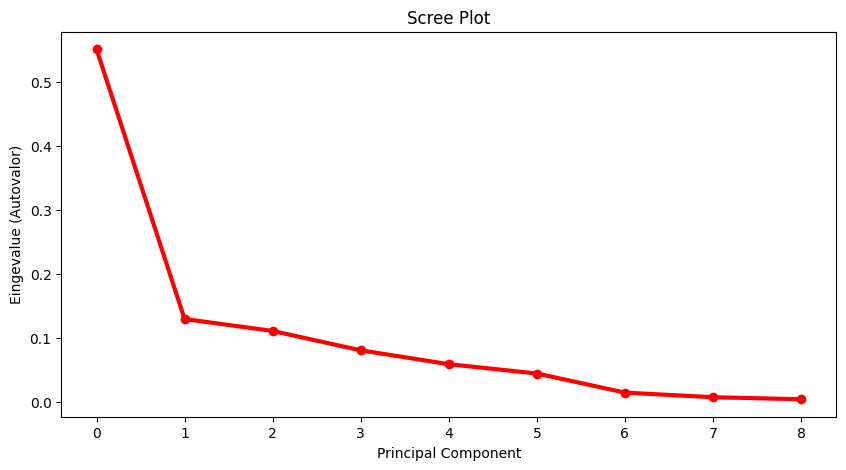

In [15]:
fig = plt.figure(figsize= (10, 5))
plt.plot(explaned_variance_ratio, 'ro-', linewidth=3)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eingevalue (Autovalor)')
plt.show()


In [16]:
df_components = pd.DataFrame(components, columns=number_columns, index = [f'Autovetor {i+1}' for i in range(n_fatores)])
df_components

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
Autovetor 1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
Autovetor 2,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
Autovetor 3,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
Autovetor 4,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486
Autovetor 5,0.342004,0.277961,0.003884,-0.031407,0.681132,0.350104,-0.289687,0.146396,0.336014
Autovetor 6,0.307190,0.212669,-0.051763,-0.065073,-0.214495,0.467020,0.586419,-0.467725,0.163471
Autovetor 7,0.357319,0.147798,-0.531450,-0.535113,-0.088293,-0.423005,-0.216760,-0.219039,-0.001545
Autovetor 8,-0.564954,0.740900,-0.332142,0.128794,-0.043236,0.046332,-0.022126,0.019462,-0.010178
Autovetor 9,-0.226373,0.235400,0.638974,-0.694279,0.002605,-0.004163,-0.011863,-0.045723,-0.027849


In [17]:
variancia_acumulada = [sum(explaned_variance_ratio[0:i+1]) for i in range(n_fatores)]
variancia_acumulada = np.round(variancia_acumulada, 2)
print('Variância Acumulada:', variancia_acumulada) #Autovalores acumulados

Variância Acumulada: [0.55 0.68 0.79 0.87 0.93 0.97 0.99 1.   1.  ]


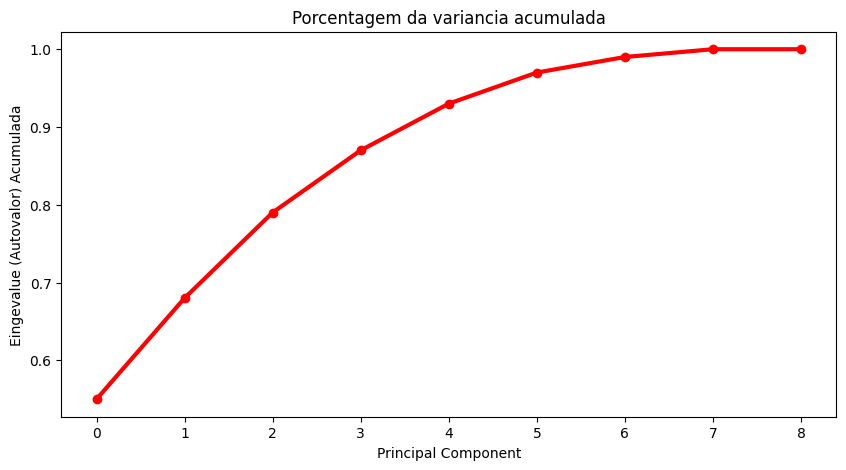

In [19]:
fig = plt.figure(figsize= (10, 5))
plt.plot(variancia_acumulada, 'ro-', linewidth=3)
plt.title('Porcentagem da variancia acumulada')
plt.xlabel('Principal Component')
plt.ylabel('Eingevalue (Autovalor) Acumulada')
plt.show()

In [20]:
#pca.explanded_variance_ --> Representa a quantidade de variáveis por cada um dos fatores.
#O valor mais exato pode ser explicado, multplicando: pca.explaned_variance_ratio pela quantidade de fatores.
autovalores = pca.explained_variance_ratio_ * n_fatores
print('proximação da Quantidade de Variáveis por cada um dos fatores:', autovalores)
#Se realizar a soma, o segundo método é oq mais se aproxima de 9.

proximação da Quantidade de Variáveis por cada um dos fatores: [4.95603069 1.16433814 0.99635412 0.72406663 0.52930223 0.39832415
 0.12966871 0.06506649 0.03684884]


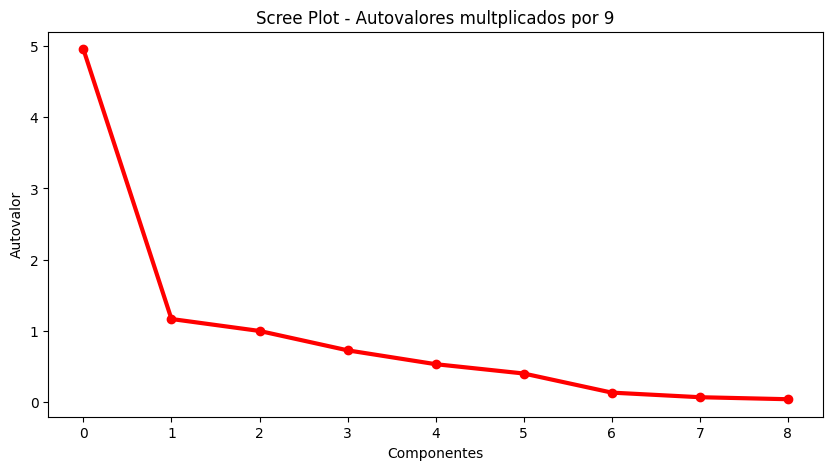

In [21]:
fatores_selecionados = ['Fator selecionado' if autovalor > 1 else 'Fator não selecionado' for autovalor in autovalores]

fig = plt.figure(figsize= (10, 5))
plt.plot(autovalores, 'ro-', linewidth=3)
plt.title('Scree Plot - Autovalores multplicados por 9')
plt.xlabel('Componentes')
plt.ylabel('Autovalor')
plt.show()

In [22]:
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

In [23]:
cargas_fatoriais = pd.DataFrame(components.T * raiz_autovalores, columns=fatores, index = number_columns)
cargas_fatoriais

,F1,F2,F3,F4,F5,F6,F7,F8,F9
renda,0.832127,0.368971,-0.172642,-0.053941,0.248819,0.193877,0.128669,-0.144109,-0.043455
quota,0.900606,0.226453,-0.154732,-0.119098,0.202225,0.134222,0.053221,0.188990,0.045188
escolaridade,0.966543,-0.024594,-0.009340,-0.071975,0.002826,-0.032669,-0.191373,-0.084723,0.122658
idade,0.960135,-0.065447,0.063367,-0.107989,-0.022849,-0.041070,-0.192692,0.032853,-0.133274
mortalidade,-0.655699,-0.176634,0.173478,-0.493701,0.495545,-0.135374,-0.031794,-0.011029,0.000500
txcresc,-0.696781,0.337446,0.277249,0.385565,0.254712,0.294750,-0.152322,0.011818,-0.000799
causasext,-0.666578,-0.043910,-0.438317,-0.417250,-0.210756,0.370106,-0.078054,-0.005644,-0.002277
favel,-0.457185,0.442840,-0.686884,0.135120,0.106508,-0.295195,-0.078875,0.004964,-0.008777
denspop,0.166281,-0.793048,-0.409402,0.324614,0.244461,0.103171,-0.000556,-0.002596,-0.005346


As cargas fatoriais vão dizer as relações entre os fatores, em relação cada variável

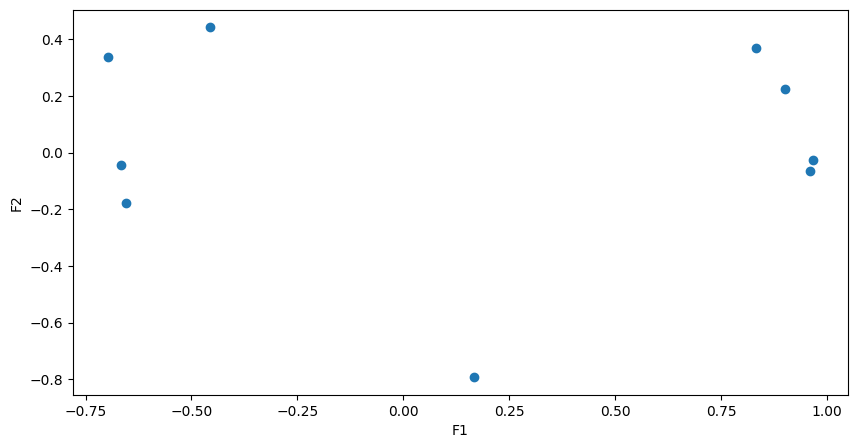

In [24]:
fig = plt.figure(figsize=(10,5))
plt.scatter(x=cargas_fatoriais['F1'], y=cargas_fatoriais['F2'])
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

Pode-se observar que as variáveis que tem maior carga fatoriais e são relevantes para o rankeamento são as: Renda, Quota, Escolaridade e Idade.

Todas elas apresenta

Reduzindo a dimensionalidade para 4 variáveis

Método Aula professora USP

In [25]:
pca = PCA(n_components=4)
pca.fit(df_dados_number)
components_principais = pca.components_
components_principais = pd.DataFrame(components_principais)
components_principais

,0,1,2,3,4,5,6,7,8
0,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
1,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
2,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
3,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486


In [26]:
components_scores = []
for i in range(4):
  scores = pca.transform(df_dados_number)[:,i]
  components_scores.append(scores)

components_scores = pd.DataFrame(components_scores).T
print(components_scores) #Scores de cada componentes.

           0         1         2         3
0   1.519105 -0.761299  0.440370  0.256326
1   3.985600  1.555514  0.313021  0.070926
2  -2.681205  2.356295  3.872196  3.061874
3  -0.574202 -1.061710 -0.214948 -0.121274
4  -0.457007 -1.688282 -0.110352  0.089602
..       ...       ...       ...       ...
91 -0.222504 -1.876371 -0.553807  0.480278
92  0.651970 -0.175635 -0.277139 -0.095741
93  0.452520  1.141560 -1.023709 -0.413869
94 -0.262248  0.698634  0.148829  0.407752
95 -2.870093 -1.073854 -0.188988  0.178396

[96 rows x 4 columns]


In [27]:
dados['scoresCP1'] = components_scores[0]
dados['scoresCP2'] = components_scores[1]
dados['scoresCP3'] = components_scores[2]
dados['scoresCP4'] = components_scores[3]
#Scores --> indicam os valores de relação de uma variável com a componente principal em questão

In [28]:
dados['Ranking'] = dados['scoresCP1'] * explaned_variance_ratio[0] + dados['scoresCP2'] * explaned_variance_ratio[1]
dados_modelo_usp = dados.copy()
dados_modelo_usp = dados_modelo_usp.drop(['scoresCP3', 'scoresCP4'], axis=1)
dados_modelo_usp #Tabela que será usada como base para a um dos gráficos

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,scoresCP1,scoresCP2,Ranking
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,1.519105,-0.761299,0.738036
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,3.985600,1.555514,2.395989
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-2.681205,2.356295,-1.171624
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.574202,-1.061710,-0.453550
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.457007,-1.688282,-0.470075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.222504,-1.876371,-0.365274
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.651970,-0.175635,0.336299
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.452520,1.141560,0.396874
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,-0.262248,0.698634,-0.054029


In [29]:
filtro_dados_modelousp= dados_modelo_usp.sort_values(by='scoresCP1', ascending=False)
filtro_dados_modelousp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,scoresCP1,scoresCP2,Ranking
44,40,Jardim Paulista,4318,104.730003,8.7,36,6.460000,-2.85,22.750000,0.00,146.330002,5.491038,0.532436,3.092632
31,26,Moema,4504,83.690002,8.6,34,8.540000,-0.83,35.750000,0.00,82.410004,4.381708,1.477302,2.603996
70,69,Santo Amaro,3898,78.900002,9.2,34,7.450000,-3.57,62.430000,0.00,40.380001,4.224362,1.574882,2.529974
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.680000,-2.52,38.570000,0.69,57.560001,3.985600,1.555514,2.395989
25,19,Consolação,3117,84.690002,8.8,35,16.420000,-2.53,30.889999,0.00,158.350006,3.910826,-0.557478,2.081454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,51,Parelheiros,901,4.510000,5.2,21,14.390000,8.22,115.220001,6.66,5.380000,-3.641506,1.708688,-1.784214
42,38,Jardim Ângela,912,6.220000,5.4,21,20.910000,4.42,117.349998,15.75,59.200001,-3.750474,0.838884,-1.956747
24,18,Cidade Tiradentes,895,1.060000,6.0,21,24.459999,11.06,104.970001,0.62,108.440002,-3.763747,-0.253586,-2.105390
29,24,Grajaú,936,4.970000,5.5,21,20.590000,7.07,97.160004,19.50,29.639999,-3.820875,1.753483,-1.877192


In [30]:
dados_mapmodelousp = gpd.read_file('SIRGAS_SHP_distrito_polygon.shp')
dados_mapmodelousp

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


In [31]:
dados_mapmodelousp.set_crs(epsg=31983, inplace=True)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


In [32]:
dados_mapmodelousp_filtro = dados_mapmodelousp.sort_values('ds_codigo')
dados_mapmodelousp_filtro

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
38,1,MOOCA,25,ARA,AGUA RASA,"POLYGON ((341093.380 7391912.491, 341093.329 7..."
40,10,MOOCA,25,BRS,BRAS,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
52,12,BUTANTA,10,BUT,BUTANTA,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
6,13,CASA VERDE-CACHOEIRINHA,04,CAC,CACHOEIRINHA,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
...,...,...,...,...,...,...
10,92,VILA MARIA-VILA GUILHERME,07,VMD,VILA MEDEIROS,"POLYGON ((340579.417 7401672.553, 340579.493 7..."
47,93,VILA PRUDENTE,29,VPR,VILA PRUDENTE,"POLYGON ((341731.295 7388459.495, 341723.755 7..."
51,94,BUTANTA,10,VSO,VILA SONIA,"POLYGON ((320805.525 7390280.495, 320824.353 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."


In [33]:
dados_modelo_usp_filtro =  dados_modelo_usp.sort_values('cod_ibge')
dados_modelo_usp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,scoresCP1,scoresCP2,Ranking
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,1.519105,-0.761299,0.738036
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,3.985600,1.555514,2.395989
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-2.681205,2.356295,-1.171624
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.574202,-1.061710,-0.453550
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.457007,-1.688282,-0.470075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.222504,-1.876371,-0.365274
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.651970,-0.175635,0.336299
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.452520,1.141560,0.396874
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,-0.262248,0.698634,-0.054029


In [34]:
nome_distritos = [unidecode(distrito).upper() for distrito in dados_modelo_usp['distritos']]
dados_modelo_usp['nome_distritos'] = nome_distritos
dados_modelo_usp['nome_distritos']

0             AGUA RASA
1     ALTO DE PINHEIROS
2            ANHANGUERA
3            ARICANDUVA
4           ARTUR ALVIM
            ...        
91        VILA MEDEIROS
92        VILA PRUDENTE
93           VILA SONIA
94         SAO DOMINGOS
95              LAJEADO
Name: nome_distritos, Length: 96, dtype: object

In [35]:
distritos_distintos = dados_modelo_usp['nome_distritos'].values != dados_mapmodelousp_filtro['ds_nome'].values
distritos_distintos.sum()

88

In [36]:
dados_modelo_usp[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,scoresCP1,scoresCP2,Ranking,nome_distritos
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,3.985600,1.555514,2.395989,ALTO DE PINHEIROS
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-2.681205,2.356295,-1.171624,ANHANGUERA
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.574202,-1.061710,-0.453550,ARICANDUVA
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.457007,-1.688282,-0.470075,ARTUR ALVIM
5,56,Barra Funda,2359,34.310001,8.0,31,8.62,-2.140000,37.900002,4.85,25.600000,1.995695,1.297122,1.266779,BARRA FUNDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,Vila Formosa,2025,29.620001,7.1,29,16.02,-1.370000,48.549999,0.88,123.529999,0.803552,-0.675622,0.355086,VILA FORMOSA
85,85,Vila Guilherme,2202,30.530001,7.4,30,14.05,-2.780000,50.099998,0.00,77.580002,1.293438,-0.051143,0.705641,VILA GUILHERME
86,86,Vila Jacuí,1118,11.930000,6.1,23,19.50,1.740000,86.120003,10.52,143.320007,-2.078124,-0.744911,-1.240731,VILA JACUI
87,87,Vila Leopoldina,2908,44.389999,7.7,30,18.26,-0.250000,57.060001,11.24,36.790001,1.018806,1.590318,0.766767,VILA LEOPOLDINA


In [37]:
dados_mapmodelousp_filtro[distritos_distintos]

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
40,10,MOOCA,25,BRS,BRAS,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
52,12,BUTANTA,10,BUT,BUTANTA,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
6,13,CASA VERDE-CACHOEIRINHA,04,CAC,CACHOEIRINHA,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
32,14,SE,09,CMB,CAMBUCI,"POLYGON ((334880.974 7391443.343, 334872.651 7..."
...,...,...,...,...,...,...
8,86,VILA MARIA-VILA GUILHERME,07,VGL,VILA GUILHERME,"POLYGON ((335923.822 7397656.796, 335922.603 7..."
89,87,SAO MIGUEL,23,VJA,VILA JACUI,"POLYGON ((349941.829 7402460.385, 349990.372 7..."
23,88,LAPA,08,VLE,VILA LEOPOLDINA,"POLYGON ((324478.928 7396017.173, 324477.633 7..."
9,89,VILA MARIA-VILA GUILHERME,07,VMR,VILA MARIA,"POLYGON ((341181.477 7399158.948, 341162.704 7..."


In [38]:
dados_modelo_usp.replace({'SARCOMA': 'SACOMA', 'Sarcomã': 'Sacoma'}, inplace=True)
dados_modelo_usp[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,scoresCP1,scoresCP2,Ranking,nome_distritos
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,3.985600,1.555514,2.395989,ALTO DE PINHEIROS
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-2.681205,2.356295,-1.171624,ANHANGUERA
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.574202,-1.061710,-0.453550,ARICANDUVA
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.457007,-1.688282,-0.470075,ARTUR ALVIM
5,56,Barra Funda,2359,34.310001,8.0,31,8.62,-2.140000,37.900002,4.85,25.600000,1.995695,1.297122,1.266779,BARRA FUNDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,Vila Formosa,2025,29.620001,7.1,29,16.02,-1.370000,48.549999,0.88,123.529999,0.803552,-0.675622,0.355086,VILA FORMOSA
85,85,Vila Guilherme,2202,30.530001,7.4,30,14.05,-2.780000,50.099998,0.00,77.580002,1.293438,-0.051143,0.705641,VILA GUILHERME
86,86,Vila Jacuí,1118,11.930000,6.1,23,19.50,1.740000,86.120003,10.52,143.320007,-2.078124,-0.744911,-1.240731,VILA JACUI
87,87,Vila Leopoldina,2908,44.389999,7.7,30,18.26,-0.250000,57.060001,11.24,36.790001,1.018806,1.590318,0.766767,VILA LEOPOLDINA


In [39]:
dados_completos = dados_mapmodelousp.merge(dados_modelo_usp, left_on = 'ds_nome', right_on = 'nome_distritos')

(311028.2445915086, 362979.62402979465, 7340122.141582586, 7419777.028684506)

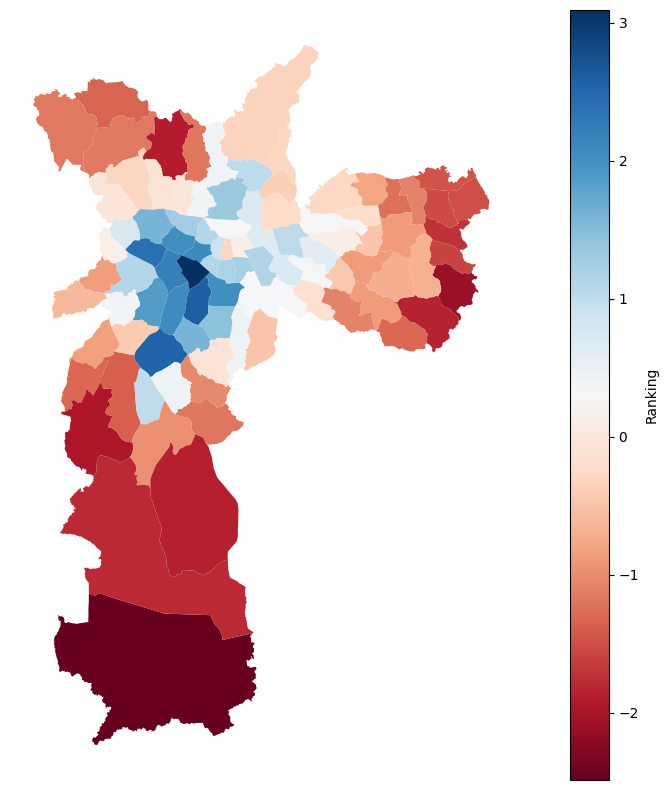

In [40]:
dados_completos.plot(column = 'Ranking', legend = True, 
                     legend_kwds = {'label': 'Ranking', 'orientation': 'vertical'}, 
                     cmap='RdBu', figsize=(15,10))
plt.axis('off')

In [41]:
dados_completos['coords'] = dados_completos['geometry'].apply(lambda x: x.representative_point().coords[0])

In [42]:
dados_completos['coords']

0       (323231.8032813262, 7402292.288036918)
1        (321422.2098127461, 7400742.57279521)
2     (322624.80941574124, 7405878.2120100865)
3       (327333.5972932541, 7405864.031109051)
4       (326859.3271614813, 7401752.634767053)
                        ...                   
91      (354622.1283182077, 7402377.671259355)
92     (347844.58213907736, 7393130.170481611)
93      (350475.1960128513, 7392156.816708864)
94      (353566.5077894452, 7393303.693813171)
95     (351568.38321637735, 7396500.432263361)
Name: coords, Length: 96, dtype: object

Reduzindo dimensionalidade

Método professor Alura

In [43]:
f1 = np.zeros(df_dados_number.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    f1 += pca.components_[0][indice]*df_dados_number[variavel]
f1

0     1.519105
1     3.985600
2    -2.681205
3    -0.574202
4    -0.457007
        ...   
91   -0.222504
92    0.651970
93    0.452520
94   -0.262248
95   -2.870093
Name: renda, Length: 96, dtype: float64

In [44]:
scores = np.zeros(df_dados_number.shape)
for i in range(4):
    scores[i] = pca.components_[i]/raiz_autovalores[i]

In [45]:
scores

array([[ 0.16790189,  0.18171917,  0.19502366,  0.19373066, -0.13230331,
        -0.14059264, -0.13449826, -0.09224829,  0.0335513 ],
       [ 0.31689332,  0.19449089, -0.02112244, -0.05620973, -0.15170332,
         0.2898178 , -0.0377124 ,  0.38033608, -0.68111471],
       [-0.1732738 , -0.1552978 , -0.00937442,  0.06359926,  0.17411264,
         0.27826353, -0.43992125, -0.68939795, -0.4109005 ],
       [-0.07449723, -0.16448449, -0.09940371, -0.14914211, -0.68184425,
         0.53249994, -0.5762597 ,  0.18661238,  0.448321  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [46]:
f1 = np.zeros(df_dados_number.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    f1 += scores[0][indice]*df_dados_number[variavel]
f1

0     0.682371
1     1.790304
2    -1.204379
3    -0.257928
4    -0.205284
        ...   
91   -0.099947
92    0.292861
93    0.203269
94   -0.117800
95   -1.289226
Name: renda, Length: 96, dtype: float64

In [47]:
f2 = np.zeros(df_dados_number.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    f2 += scores[1][indice]*df_dados_number[variavel]
f2

0    -0.705531
1     1.441565
2     2.183685
3    -0.983935
4    -1.564607
        ...   
91   -1.738918
92   -0.162769
93    1.057936
94    0.647456
95   -0.995189
Name: renda, Length: 96, dtype: float64

In [48]:
f3 = np.zeros(df_dados_number.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    f3 += scores[2][indice]*df_dados_number[variavel]
f3

0     0.441175
1     0.313593
2     3.879274
3    -0.215340
4    -0.110554
        ...   
91   -0.554819
92   -0.277645
93   -1.025580
94    0.149101
95   -0.189333
Name: renda, Length: 96, dtype: float64

In [49]:
f4 = np.zeros(df_dados_number.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    f4 += scores[3][indice]*df_dados_number[variavel]
f4

0     0.301234
1     0.083352
2     3.598306
3    -0.142521
4     0.105300
        ...   
91    0.564422
92   -0.112515
93   -0.486378
94    0.479190
95    0.209650
Name: renda, Length: 96, dtype: float64

In [50]:
dados['F1'] = f1
dados['F2'] = f2
dados['F3'] = f3
dados['F4'] = f4

Comparação entre modelos de SCORES FATORIAIS (USP - ALURA)

In [51]:
colunas = ['scoresCP1', 'scoresCP2', 'scoresCP3', 'scoresCP4', 'F1', 'F2', 'F3', 'F4']
dataframe_scores = dados[colunas]
dataframe_scores

,scoresCP1,scoresCP2,scoresCP3,scoresCP4,F1,F2,F3,F4
0,1.519105,-0.761299,0.440370,0.256326,0.682371,-0.705531,0.441175,0.301234
1,3.985600,1.555514,0.313021,0.070926,1.790304,1.441565,0.313593,0.083352
2,-2.681205,2.356295,3.872196,3.061874,-1.204379,2.183685,3.879274,3.598306
3,-0.574202,-1.061710,-0.214948,-0.121274,-0.257928,-0.983935,-0.215340,-0.142521
4,-0.457007,-1.688282,-0.110352,0.089602,-0.205284,-1.564607,-0.110554,0.105300
...,...,...,...,...,...,...,...,...
91,-0.222504,-1.876371,-0.553807,0.480278,-0.099947,-1.738918,-0.554819,0.564422
92,0.651970,-0.175635,-0.277139,-0.095741,0.292861,-0.162769,-0.277645,-0.112515
93,0.452520,1.141560,-1.023709,-0.413869,0.203269,1.057936,-1.025580,-0.486378
94,-0.262248,0.698634,0.148829,0.407752,-0.117800,0.647456,0.149101,0.479190


In [52]:
dados['Rankings'] = dados['F1'] * explaned_variance_ratio[0] + dados['F2'] * explaned_variance_ratio[1]
dados_modelo_alura = dados.copy()
colunas = ['scoresCP1', 'scoresCP2', 'scoresCP3', 'scoresCP4', 'Ranking', 'F3', 'F4']
dados_modelo_alura = dados_modelo_alura.drop(colunas, axis=1)
dados_modelo_alura

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.705531,0.284486
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.441565,1.172363
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.183685,-0.380710
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-0.983935,-0.269326
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.564607,-0.315459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.292861,-0.162769,0.140212
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.203269,1.057936,0.248800
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,-0.117800,0.647456,0.018893


In [53]:
filtro_dados_modeloalura = dados_modelo_alura.sort_values(by='Rankings', ascending=False)
filtro_dados_modeloalura

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings
44,40,Jardim Paulista,4318,104.730003,8.7,36,6.460000,-2.85,22.750000,0.00,146.330002,2.466536,0.493433,1.422083
31,26,Moema,4504,83.690002,8.6,34,8.540000,-0.83,35.750000,0.00,82.410004,1.968233,1.369083,1.260966
70,69,Santo Amaro,3898,78.900002,9.2,34,7.450000,-3.57,62.430000,0.00,40.380001,1.897554,1.459515,1.233745
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.680000,-2.52,38.570000,0.69,57.560001,1.790304,1.441565,1.172363
53,50,Morumbi,5146,102.010002,7.4,28,12.350000,-0.75,79.400002,14.30,33.820000,1.166425,3.021258,1.033178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,38,Jardim Ângela,912,6.220000,5.4,21,20.910000,4.42,117.349998,15.75,59.200001,-1.684687,0.777432,-0.827130
95,96,Lajeado,775,8.490000,5.4,21,18.650000,2.83,103.320000,3.84,141.009995,-1.289226,-0.995189,-0.838686
10,3,Brasilândia,975,8.220000,5.8,22,22.000000,3.14,125.019997,16.60,112.059998,-1.531760,-0.046604,-0.849523
24,18,Cidade Tiradentes,895,1.060000,6.0,21,24.459999,11.06,104.970001,0.62,108.440002,-1.690649,-0.235010,-0.961393


In [54]:
dados_mapmodeloalura = gpd.read_file('SIRGAS_SHP_distrito_polygon.shp')
dados_mapmodeloalura

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


In [55]:
dados_mapmodeloalura.set_crs(epsg=31983, inplace=True)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


<Axes: >

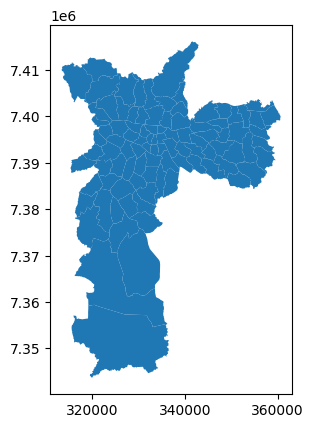

In [56]:
dados_mapmodeloalura.plot()

In [57]:
dados_mapmodeloalura_filtro = dados_mapmodeloalura.sort_values('ds_codigo')
dados_mapmodeloalura_filtro

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
38,1,MOOCA,25,ARA,AGUA RASA,"POLYGON ((341093.380 7391912.491, 341093.329 7..."
40,10,MOOCA,25,BRS,BRAS,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
52,12,BUTANTA,10,BUT,BUTANTA,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
6,13,CASA VERDE-CACHOEIRINHA,04,CAC,CACHOEIRINHA,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
...,...,...,...,...,...,...
10,92,VILA MARIA-VILA GUILHERME,07,VMD,VILA MEDEIROS,"POLYGON ((340579.417 7401672.553, 340579.493 7..."
47,93,VILA PRUDENTE,29,VPR,VILA PRUDENTE,"POLYGON ((341731.295 7388459.495, 341723.755 7..."
51,94,BUTANTA,10,VSO,VILA SONIA,"POLYGON ((320805.525 7390280.495, 320824.353 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."


In [58]:
dados_modelo_alura_filtro =  dados_modelo_alura.sort_values('cod_ibge')
dados_modelo_alura_filtro

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.860000,-1.84,52.980000,0.00,125.610001,0.682371,-0.705531,0.284486
9,2,Brás,1942,28.969999,7.0,30,13.640000,-4.48,120.669998,0.00,76.190002,0.114900,-0.361695,0.016479
10,3,Brasilândia,975,8.220000,5.8,22,22.000000,3.14,125.019997,16.60,112.059998,-1.531760,-0.046604,-0.849523
11,4,Butantã,2311,50.320000,8.4,31,18.129999,-1.60,44.730000,0.26,42.820000,0.843868,0.596856,0.541908
12,5,Cachoeirinha,1347,12.340000,6.2,23,15.710000,2.28,105.599998,17.42,105.919998,-1.011355,0.365884,-0.509588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.430000,-1.41,77.980003,2.49,188.929993,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,1755,32.080002,7.2,30,14.360000,-2.55,66.510002,7.43,101.440002,0.292861,-0.162769,0.140212
93,94,Vila Sônia,2970,41.410000,7.4,27,16.760000,-0.90,74.680000,14.93,80.120003,0.203269,1.057936,0.248800
94,95,São Domingos,2047,23.510000,6.8,26,14.300000,0.71,62.349998,8.55,72.919998,-0.117800,0.647456,0.018893


In [59]:
nome_distritos = [unidecode(distrito).upper() for distrito in dados_modelo_alura['distritos']]
dados_modelo_alura['nome_distritos'] = nome_distritos
dados_modelo_alura['nome_distritos']

0             AGUA RASA
1     ALTO DE PINHEIROS
2            ANHANGUERA
3            ARICANDUVA
4           ARTUR ALVIM
            ...        
91        VILA MEDEIROS
92        VILA PRUDENTE
93           VILA SONIA
94         SAO DOMINGOS
95              LAJEADO
Name: nome_distritos, Length: 96, dtype: object

In [60]:
distritos_distintos = dados_modelo_alura['nome_distritos'].values != dados_mapmodeloalura_filtro['ds_nome'].values
distritos_distintos.sum()

88

In [61]:
dados_modelo_alura[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings,nome_distritos
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.441565,1.172363,ALTO DE PINHEIROS
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.183685,-0.380710,ANHANGUERA
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-0.983935,-0.269326,ARICANDUVA
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.564607,-0.315459,ARTUR ALVIM
5,56,Barra Funda,2359,34.310001,8.0,31,8.62,-2.140000,37.900002,4.85,25.600000,0.896452,1.202102,0.649166,BARRA FUNDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,Vila Formosa,2025,29.620001,7.1,29,16.02,-1.370000,48.549999,0.88,123.529999,0.360950,-0.626129,0.117761,VILA FORMOSA
85,85,Vila Guilherme,2202,30.530001,7.4,30,14.05,-2.780000,50.099998,0.00,77.580002,0.581004,-0.047397,0.313809,VILA GUILHERME
86,86,Vila Jacuí,1118,11.930000,6.1,23,19.50,1.740000,86.120003,10.52,143.320007,-0.933479,-0.690343,-0.603349,VILA JACUI
87,87,Vila Leopoldina,2908,44.389999,7.7,30,18.26,-0.250000,57.060001,11.24,36.790001,0.457640,1.473820,0.442678,VILA LEOPOLDINA


In [62]:
dados_mapmodeloalura_filtro[distritos_distintos]

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
40,10,MOOCA,25,BRS,BRAS,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
52,12,BUTANTA,10,BUT,BUTANTA,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
6,13,CASA VERDE-CACHOEIRINHA,04,CAC,CACHOEIRINHA,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
32,14,SE,09,CMB,CAMBUCI,"POLYGON ((334880.974 7391443.343, 334872.651 7..."
...,...,...,...,...,...,...
8,86,VILA MARIA-VILA GUILHERME,07,VGL,VILA GUILHERME,"POLYGON ((335923.822 7397656.796, 335922.603 7..."
89,87,SAO MIGUEL,23,VJA,VILA JACUI,"POLYGON ((349941.829 7402460.385, 349990.372 7..."
23,88,LAPA,08,VLE,VILA LEOPOLDINA,"POLYGON ((324478.928 7396017.173, 324477.633 7..."
9,89,VILA MARIA-VILA GUILHERME,07,VMR,VILA MARIA,"POLYGON ((341181.477 7399158.948, 341162.704 7..."


In [63]:
dados_modelo_alura.replace({'SARCOMA': 'SACOMA', 'Sarcomã': 'Sacoma'}, inplace=True)
dados_modelo_alura[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings,nome_distritos
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.441565,1.172363,ALTO DE PINHEIROS
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.183685,-0.380710,ANHANGUERA
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-0.983935,-0.269326,ARICANDUVA
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.564607,-0.315459,ARTUR ALVIM
5,56,Barra Funda,2359,34.310001,8.0,31,8.62,-2.140000,37.900002,4.85,25.600000,0.896452,1.202102,0.649166,BARRA FUNDA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,Vila Formosa,2025,29.620001,7.1,29,16.02,-1.370000,48.549999,0.88,123.529999,0.360950,-0.626129,0.117761,VILA FORMOSA
85,85,Vila Guilherme,2202,30.530001,7.4,30,14.05,-2.780000,50.099998,0.00,77.580002,0.581004,-0.047397,0.313809,VILA GUILHERME
86,86,Vila Jacuí,1118,11.930000,6.1,23,19.50,1.740000,86.120003,10.52,143.320007,-0.933479,-0.690343,-0.603349,VILA JACUI
87,87,Vila Leopoldina,2908,44.389999,7.7,30,18.26,-0.250000,57.060001,11.24,36.790001,0.457640,1.473820,0.442678,VILA LEOPOLDINA


In [64]:
dados_completos = dados_mapmodeloalura.merge(dados_modelo_alura, left_on = 'ds_nome', right_on = 'nome_distritos')

(311028.2445915086, 362979.62402979465, 7340122.141582586, 7419777.028684506)

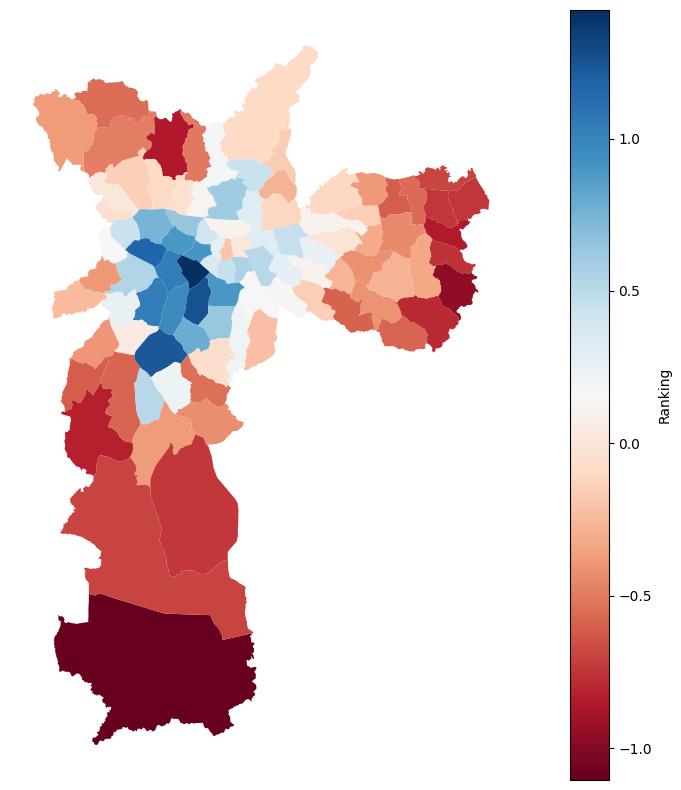

In [65]:
dados_completos.plot(column = 'Rankings', legend = True, 
                     legend_kwds = {'label': 'Ranking', 'orientation': 'vertical'}, 
                     cmap='RdBu', figsize=(15,10))
plt.axis('off')

In [66]:
dados_completos['coords'] = dados_completos['geometry'].apply(lambda x: x.representative_point().coords[0])

In [67]:
dados_completos['coords']

0       (323231.8032813262, 7402292.288036918)
1        (321422.2098127461, 7400742.57279521)
2     (322624.80941574124, 7405878.2120100865)
3       (327333.5972932541, 7405864.031109051)
4       (326859.3271614813, 7401752.634767053)
                        ...                   
91      (354622.1283182077, 7402377.671259355)
92     (347844.58213907736, 7393130.170481611)
93      (350475.1960128513, 7392156.816708864)
94      (353566.5077894452, 7393303.693813171)
95     (351568.38321637735, 7396500.432263361)
Name: coords, Length: 96, dtype: object